<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/Valuation_of_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
rate = np.log(1 + 15/100)
life = 30
paths = 10000

In [ ]:
data_df = pd.DataFrame({
    'Year' : 2013 + np.arange(12),
    'CFO' : [14035,	13146,	11880,	11455,	10824,	8023,	25336,	20169,	44327,	44381,	21683,	20301]
})

In [ ]:
data_df

,Year,CFO
0,2013,14035
1,2014,13146
2,2015,11880
3,2016,11455
4,2017,10824
5,2018,8023
6,2019,25336
7,2020,20169
8,2021,44327
9,2022,44381


In [ ]:
min_CFO = data_df['CFO'].min()
base = min_CFO if min_CFO < 0 else 0

In [ ]:
data_df.eval('S = log(CFO - @base + 1.0e-12)', inplace = True)
data_df['prev_S'] = data_df['S'].shift(1)

In [ ]:
data_df.dropna(inplace = True)

In [ ]:
data_df.eval('r = S - prev_S', inplace = True)

In [ ]:
data_df

,Year,CFO,S,prev_S,r
1,2014,13146,9.483873,9.549309,-0.065437
2,2015,11880,9.382612,9.483873,-0.101261
3,2016,11455,9.346182,9.382612,-0.036430
4,2017,10824,9.289521,9.346182,-0.056660
5,2018,8023,8.990068,9.289521,-0.299453
6,2019,25336,10.139982,8.990068,1.149914
7,2020,20169,9.911902,10.139982,-0.228080
8,2021,44327,10.699349,9.911902,0.787447
9,2022,44381,10.700567,10.699349,0.001217
10,2023,21683,9.984284,10.700567,-0.716283


In [ ]:
mu = data_df['r'].mean()
sigma = data_df['r'].std()

In [ ]:
(mu, sigma)

(0.033555994191304735, 0.5107009901648076)

In [ ]:
delta_t = 1/365

In [ ]:
W = np.cumsum(np.random.standard_normal(size = [life * 365, paths]), axis = 0) * np.sqrt(delta_t)
t = np.arange(life * 365)[..., np.newaxis] / 365.0

forecast_data = np.exp((mu - rate) * t + sigma * W)

In [ ]:
forecast_df = pd.DataFrame(
    data = forecast_data,
    columns = [f'DCF_{idx + 1}' for idx in range(paths)],
    index = t[..., 0]
)

In [ ]:
pe_ratio = forecast_df.sum().mean() * delta_t

In [ ]:
pe_ratio

39.128298020853265

<Axes: xlabel='index', ylabel='DCF_1'>

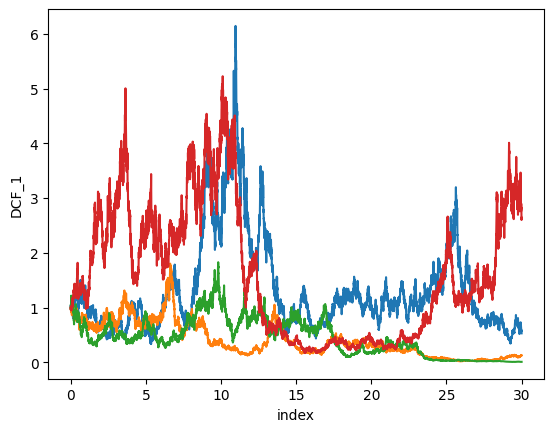

In [ ]:
sns.lineplot(x = 'index', y = 'DCF_1', data = forecast_df.reset_index())
sns.lineplot(x = 'index', y = 'DCF_2', data = forecast_df.reset_index())
sns.lineplot(x = 'index', y = 'DCF_3', data = forecast_df.reset_index())
sns.lineplot(x = 'index', y = 'DCF_4', data = forecast_df.reset_index())